In [1]:
%load_ext autoreload
%autoreload 2

# Link to the dataset

https://www.kaggle.com/datasets/martinagalasso/global-health-and-development-2012-2021

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('global_health.csv')

In [5]:
df

,Country,Country_Code,Year,Fertility_Rate,Urban_Population_Percent,Total_Population,Water_Access_Percent,Unemployment_Rate,Sanitary_Expense_Per_GDP,Life_Expectancy,...,Sanitary_Expense_Per_Capita,CO2_Exposure_Percent,Air_Pollution,Labour_Force_Total,Tuberculosis_Per_100000,Suicide_Rate_Percent,Obesity_Rate_Percent,Underweight_Rate_Percent,Overweight_Rate_Percent,Safe_Water_Access_Percent
0,Afghanistan,AFG,2012,5.830,24.160,30466479.0,21.123996,7.909,7.897169,61.923,...,52.613541,70.922317,70.922317,7520865.0,189.0,3.68,10.70,10.15,31.55,46.68
1,Afghanistan,AFG,2013,5.696,24.373,31541209.0,22.034470,7.919,8.805964,62.417,...,56.305542,73.131816,73.131816,7881567.0,189.0,3.66,11.55,10.79,32.73,49.45
2,Afghanistan,AFG,2014,5.560,24.587,32716210.0,22.944301,7.915,9.528878,62.545,...,60.189579,77.143728,77.143728,8285362.0,189.0,3.60,10.44,10.17,33.95,52.25
3,Afghanistan,AFG,2015,5.405,24.803,33753499.0,23.853590,9.011,10.105348,62.659,...,60.058540,73.490818,73.490818,8630724.0,189.0,3.57,11.19,10.52,35.19,55.09
4,Afghanistan,AFG,2016,5.262,25.020,34636207.0,24.762220,10.100,11.818590,63.136,...,61.486458,72.765910,72.765910,8913938.0,189.0,3.61,11.99,7.88,36.45,57.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,Zimbabwe,ZWE,2017,3.706,32.237,14751101.0,26.944588,6.347,6.363583,60.709,...,92.254288,17.997754,17.997754,5626689.0,221.0,15.02,10.27,9.99,17.43,50.06
1876,Zimbabwe,ZWE,2018,3.659,32.209,15052184.0,26.807938,6.792,4.670392,61.414,...,114.632950,19.112099,19.112099,5770751.0,210.0,14.00,10.69,5.18,17.81,49.46
1877,Zimbabwe,ZWE,2019,3.599,32.210,15354608.0,26.683978,7.373,3.232802,61.292,...,54.808506,18.528607,18.528607,5912685.0,199.0,14.12,11.11,5.14,18.22,48.87
1878,Zimbabwe,ZWE,2020,3.545,32.242,15669666.0,26.573846,8.621,2.954401,61.124,...,50.676510,19.494180,19.494180,6001349.0,188.0,NaN,11.53,5.11,18.65,48.28


147.8

In [12]:
df.isnull().sum()

Country                             0
Country_Code                        0
Year                                0
Fertility_Rate                     36
Urban_Population_Percent            0
Total_Population                    0
Water_Access_Percent              655
Unemployment_Rate                 140
Sanitary_Expense_Per_GDP           46
Life_Expectancy                    40
Life_Expectancy_Female             40
Life_Expectancy_Male               40
Infant_Deaths                      10
GDP_Per_Capita                     27
Hospital_Beds_Per_1000            599
Female_Population                   0
Male_Population                     0
Alcohol_Consumption_Per_Capita    256
Immunization_Rate                  10
Sanitary_Expense_Per_Capita        47
CO2_Exposure_Percent              197
Air_Pollution                     197
Labour_Force_Total                140
Tuberculosis_Per_100000           210
Suicide_Rate_Percent              608
Obesity_Rate_Percent              230
Underweight_

In [7]:
len(df['Country'].unique()) #total number of countries

188

In [9]:
df['Year'].min(), df['Year'].max()

(2012, 2021)

In [10]:
df.columns

Index(['Country', 'Country_Code', 'Year', 'Fertility_Rate',
       'Urban_Population_Percent', 'Total_Population', 'Water_Access_Percent',
       'Unemployment_Rate', 'Sanitary_Expense_Per_GDP', 'Life_Expectancy',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Infant_Deaths',
       'GDP_Per_Capita', 'Hospital_Beds_Per_1000', 'Female_Population',
       'Male_Population', 'Alcohol_Consumption_Per_Capita',
       'Immunization_Rate', 'Sanitary_Expense_Per_Capita',
       'CO2_Exposure_Percent', 'Air_Pollution', 'Labour_Force_Total',
       'Tuberculosis_Per_100000', 'Suicide_Rate_Percent',
       'Obesity_Rate_Percent', 'Underweight_Rate_Percent',
       'Overweight_Rate_Percent', 'Safe_Water_Access_Percent'],
      dtype='object')

In [17]:
# top countries by fertility rate

df.groupby('Country')['Fertility_Rate'].mean().dropna().sort_values(ascending=False)

Country
Niger                       7.1155
Chad                        6.5868
Congo, Dem. Rep.            6.3664
Mali                        6.2687
Central African Republic    6.0178
                             ...  
Malta                       1.2790
Spain                       1.2760
San Marino                  1.2600
Singapore                   1.1830
Korea, Rep.                 1.0692
Name: Fertility_Rate, Length: 186, dtype: float64

In [18]:
# I think there are some outliers because 133.5% is impossible

df.groupby('Country')['Suicide_Rate_Percent'].mean().dropna().sort_values(ascending=False)

Country
Lesotho                 133.53750
Kiribati                 29.42125
Eswatini                 26.03750
Kazakhstan               22.55625
Belarus                  22.49500
                          ...    
Jordan                    0.70500
Syrian Arab Republic      0.69500
Grenada                   0.45000
Barbados                  0.29000
Antigua and Barbuda       0.00000
Name: Suicide_Rate_Percent, Length: 159, dtype: float64

In [23]:
df.groupby('Country')[['Air_Pollution', 'Life_Expectancy_Female', 'Life_Expectancy_Male']].mean().dropna().sort_values(by=['Life_Expectancy_Female'])

,Air_Pollution,Life_Expectancy_Female,Life_Expectancy_Male
Country,,,
Nigeria,58.521543,52.5555,51.8837
Chad,54.284195,53.4744,50.5448
Lesotho,24.434616,54.7010,49.2336
Central African Republic,34.436112,55.0395,51.0943
South Sudan,35.015471,57.0966,53.9315
...,...,...,...
Switzerland,10.743886,85.4000,81.3300
"Korea, Rep.",26.478253,85.5200,79.3400
France,10.877877,85.6700,79.3600


In [24]:
df.columns

Index(['Country', 'Country_Code', 'Year', 'Fertility_Rate',
       'Urban_Population_Percent', 'Total_Population', 'Water_Access_Percent',
       'Unemployment_Rate', 'Sanitary_Expense_Per_GDP', 'Life_Expectancy',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Infant_Deaths',
       'GDP_Per_Capita', 'Hospital_Beds_Per_1000', 'Female_Population',
       'Male_Population', 'Alcohol_Consumption_Per_Capita',
       'Immunization_Rate', 'Sanitary_Expense_Per_Capita',
       'CO2_Exposure_Percent', 'Air_Pollution', 'Labour_Force_Total',
       'Tuberculosis_Per_100000', 'Suicide_Rate_Percent',
       'Obesity_Rate_Percent', 'Underweight_Rate_Percent',
       'Overweight_Rate_Percent', 'Safe_Water_Access_Percent'],
      dtype='object')

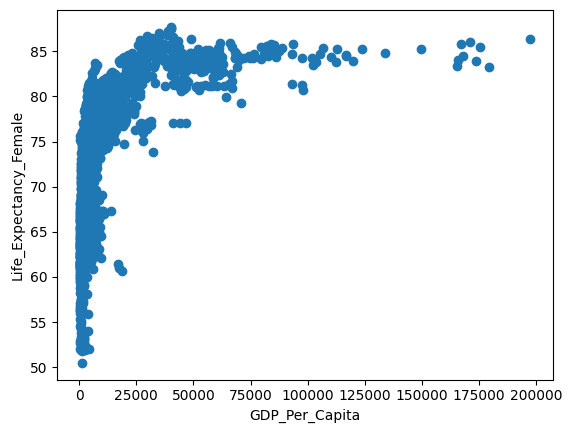

In [36]:
# let's try to correlate different values
def show_corr(df, col1, col2):
    x = df[col1].values
    y = df[col2].values

    plt.scatter(x, y)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

show_corr(df, 'GDP_Per_Capita', 'Life_Expectancy_Female')

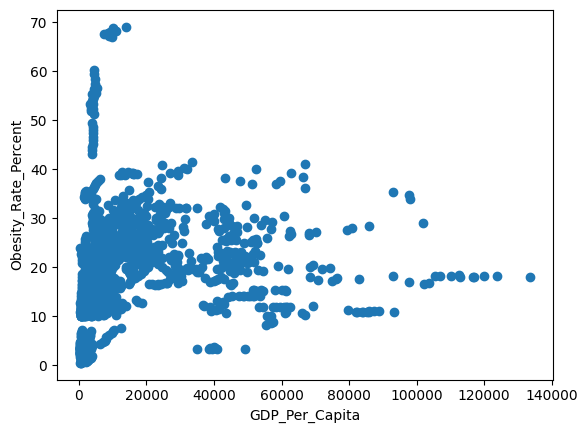

In [37]:
# GDP vs obesity rate

show_corr(df, 'GDP_Per_Capita', 'Obesity_Rate_Percent')

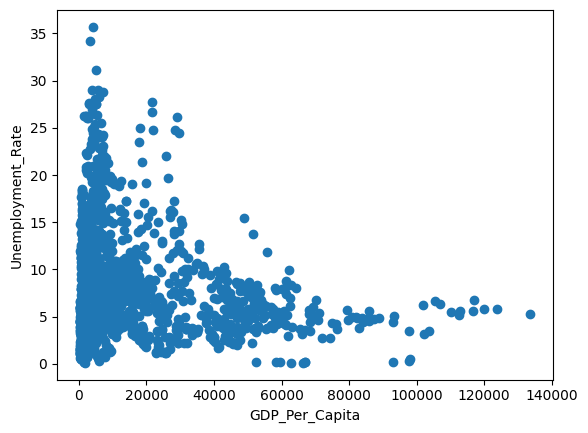

In [38]:
show_corr(df, 'GDP_Per_Capita', 'Unemployment_Rate')

In [46]:
df.columns

Index(['Country', 'Country_Code', 'Year', 'Fertility_Rate',
       'Urban_Population_Percent', 'Total_Population', 'Water_Access_Percent',
       'Unemployment_Rate', 'Sanitary_Expense_Per_GDP', 'Life_Expectancy',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Infant_Deaths',
       'GDP_Per_Capita', 'Hospital_Beds_Per_1000', 'Female_Population',
       'Male_Population', 'Alcohol_Consumption_Per_Capita',
       'Immunization_Rate', 'Sanitary_Expense_Per_Capita',
       'CO2_Exposure_Percent', 'Air_Pollution', 'Labour_Force_Total',
       'Tuberculosis_Per_100000', 'Suicide_Rate_Percent',
       'Obesity_Rate_Percent', 'Underweight_Rate_Percent',
       'Overweight_Rate_Percent', 'Safe_Water_Access_Percent'],
      dtype='object')

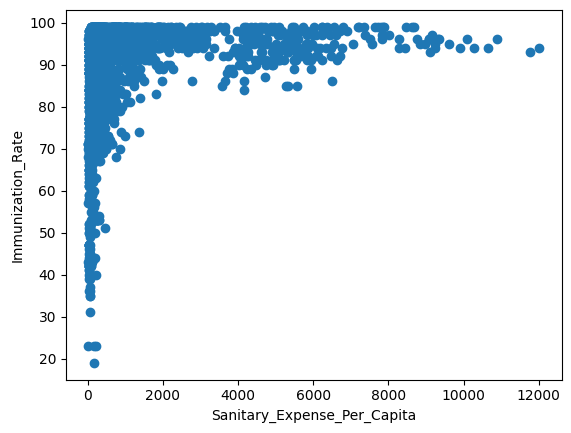

In [48]:
show_corr(df, 'Sanitary_Expense_Per_Capita', 'Immunization_Rate')

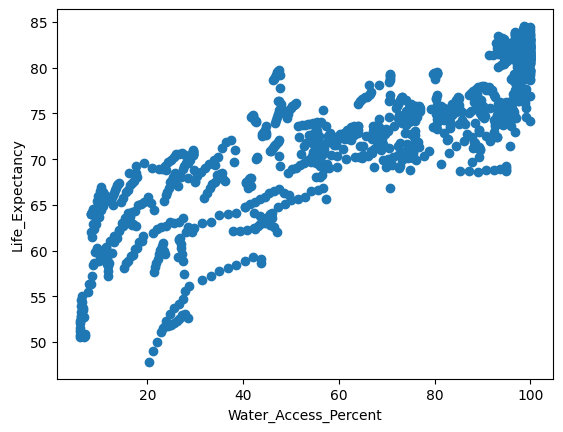

In [50]:
show_corr(df, 'Water_Access_Percent', 'Life_Expectancy')

In [45]:
df.groupby(['Country', 'Year'])['Total_Population'].mean().sort_values()

Country  Year
Nauru    2012    1.044400e+04
         2013    1.069400e+04
Tuvalu   2017    1.082800e+04
         2016    1.085200e+04
         2012    1.085400e+04
                     ...     
China    2018    1.402760e+09
India    2021    1.407564e+09
China    2019    1.407745e+09
         2020    1.411100e+09
         2021    1.412360e+09
Name: Total_Population, Length: 1880, dtype: float64

# Let's try to choose the country to move to


In [ ]:
df.columns

Index(['Country', 'Country_Code', 'Year', 'Fertility_Rate',
       'Urban_Population_Percent', 'Total_Population', 'Water_Access_Percent',
       'Unemployment_Rate', 'Sanitary_Expense_Per_GDP', 'Life_Expectancy',
       'Life_Expectancy_Female', 'Life_Expectancy_Male', 'Infant_Deaths',
       'GDP_Per_Capita', 'Hospital_Beds_Per_1000', 'Female_Population',
       'Male_Population', 'Alcohol_Consumption_Per_Capita',
       'Immunization_Rate', 'Sanitary_Expense_Per_Capita',
       'CO2_Exposure_Percent', 'Air_Pollution', 'Labour_Force_Total',
       'Tuberculosis_Per_100000', 'Suicide_Rate_Percent',
       'Obesity_Rate_Percent', 'Underweight_Rate_Percent',
       'Overweight_Rate_Percent', 'Safe_Water_Access_Percent'],
      dtype='object')

### 1. Clear air

In [56]:
median_air_pollution = df.groupby('Country')['Air_Pollution'].mean().sort_values().median() #filter countries which have air pollution higher than the median

df_sampled = df[df['Air_Pollution'] < median_air_pollution]

### 2. Low unemployment rate

In [62]:
median_unemployment_rate = df.groupby('Country')['Unemployment_Rate'].mean().sort_values().median()

df_sampled = df_sampled[df_sampled['Unemployment_Rate'] < median_unemployment_rate]

### 3. Low suicide rate

In [71]:
median_suicide_rate_percent = df.groupby('Country')['Suicide_Rate_Percent'].mean().dropna().sort_values().median()

df_sampled = df_sampled[df_sampled['Suicide_Rate_Percent'] < median_suicide_rate_percent]

### 4. Low tuberculosis per 1000000

In [76]:
median_tuberculosis_rate = df.groupby('Country')['Tuberculosis_Per_100000'].mean().dropna().median()

df_sampled = df_sampled[df_sampled['Tuberculosis_Per_100000'] < median_tuberculosis_rate]

In [79]:
df_sampled.Country.unique()

array(['Comoros', 'Dominican Republic', 'Ecuador', 'Fiji', 'Guatemala',
       'Honduras', 'Israel', 'Jamaica', 'Japan', 'Maldives', 'Malta',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Singapore', 'Tonga',
       'Turkmenistan'], dtype=object)

# I just love Asian culture so I choose Japan or Singapore